<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
df_num = df.select_dtypes(include=np.number)
df_num = df_num.fillna(df_num.mean())

scaler = MinMaxScaler()

df_num_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

df_cat = df.select_dtypes(include='object')
df_cat_dummies = pd.get_dummies(df_cat)
df_procesado = pd.concat([df_num_scaled, df_cat_dummies], axis=1)

print(f"Dimensiones del DataFrame original: {df.shape}")
print(f"Dimensiones del DataFrame procesado: {df_procesado.shape}")
print("\nPrimeras 5 filas de df_procesado:")
df_procesado.head()

Dimensiones del DataFrame original: (36791, 12)
Dimensiones del DataFrame procesado: (36791, 36)

Primeras 5 filas de df_procesado:


,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [4]:
from sklearn.cluster import KMeans
from IPython.display import display

n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_procesado)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

df_clustered = df.copy()
df_clustered['cluster'] = labels

original_num_vars = df.select_dtypes(include=np.number).columns.tolist()

print("--- 1. Valor Promedio de Variables Numéricas por Cluster ---")
summary_mean = df_clustered.groupby('cluster')[original_num_vars].mean()
display(summary_mean)

print("\n--- 2. Moda de Variables Numéricas por Cluster ---")
summary_mode = df_clustered.groupby('cluster')[original_num_vars].apply(lambda x: x.mode().iloc[0])
display(summary_mode)

print("\n--- 3. (Extra) Moda de Variables Categóricas por Cluster ---")
original_cat_vars = df.select_dtypes(include='object').columns.tolist()
summary_mode_cat = df_clustered.groupby('cluster')[original_cat_vars].apply(lambda x: x.mode().iloc[0])
display(summary_mode_cat)

--- 1. Valor Promedio de Variables Numéricas por Cluster ---


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,1998.528821,2.345201,4.430432,406.876555,0.172926
1,2003.358478,1.922741,4.044562,327.754130,0.139615
2,1997.860657,3.184894,5.595112,468.519901,0.199416
3,2000.216945,4.117672,6.581729,537.657591,0.228489
4,1997.064021,5.167600,8.031159,662.049423,0.281385
5,2004.016805,3.425859,6.193629,468.330734,0.199476
6,1999.383070,4.989295,7.677866,651.626738,0.275718
7,2003.704695,2.704675,4.940074,407.457375,0.172955



--- 2. Moda de Variables Numéricas por Cluster ---


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,1984.0,2.0,4.0,423.190476,0.180258
1,2017.0,2.0,4.0,370.291667,0.157725
2,1984.0,3.0,6.0,493.722222,0.210301
3,1985.0,4.3,6.0,555.437500,0.222671
4,1984.0,5.0,8.0,592.466667,0.252361
5,2005.0,3.0,6.0,493.722222,0.199232
6,2003.0,5.7,8.0,592.466667,0.252361
7,2017.0,2.0,4.0,423.190476,0.180258



--- 3. (Extra) Moda de Variables Categóricas por Cluster ---


,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
cluster,,,,,,,
0,Coches pequeños,dos,Manual,Normal,pequeño,bajo,bajo
1,Coches pequeños,dos,Automatica,Normal,muy pequeño,muy bajo,muy bajo
2,Coches pequeños,dos,Automatica,Normal,mediano,moderado,moderado
3,Camionetas,dos,Automatica,Normal,grande,alto,alto
4,Furgoneta,dos,Automatica,Normal,muy grande,muy alto,muy alto
5,Coches pequeños,dos,Automatica,Premium,mediano,moderado,moderado
6,Camionetas,cuatro,Automatica,Normal,muy grande,muy alto,muy alto
7,Coches pequeños,dos,Automatica,Normal,pequeño,bajo,bajo


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

Calculando inercia para cada valor de k...
  k=5, Inercia=102310.09
  k=10, Inercia=84705.94
  k=20, Inercia=67073.43
  k=30, Inercia=55953.93
  k=50, Inercia=44887.89
  k=75, Inercia=36797.32
  k=100, Inercia=30896.22
  k=200, Inercia=17625.99
  k=300, Inercia=11234.82
Cálculo finalizado.


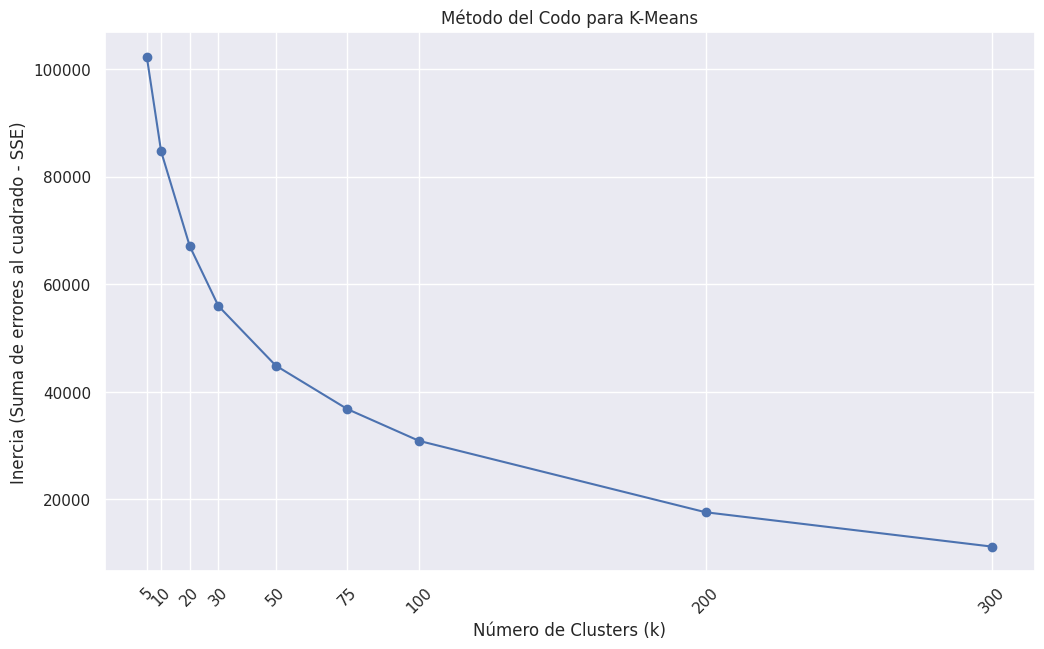

In [5]:
import matplotlib.pyplot as plt

range_n_clusters = [5, 10, 20, 30, 50, 75, 100, 200, 300]
inertia_values = []

print("Calculando inercia para cada valor de k...")

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_procesado)

    inertia_values.append(kmeans.inertia_)
    print(f"  k={n_clusters}, Inercia={kmeans.inertia_:.2f}")

print("Cálculo finalizado.")

plt.figure(figsize=(12, 7))
plt.plot(range_n_clusters, inertia_values, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de errores al cuadrado - SSE)')
plt.title('Método del Codo para K-Means')
plt.xticks(range_n_clusters, rotation=45)
plt.grid(True)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Al analizar el gráfico del método del codo, se observa una reducción significativa de la inercia (SSE) a medida que el número de clusters (k) aumenta de 5 a 50. Sin embargo, después de k=50 y especialmente hacia k=75, la curva se atenúa notablemente, indicando rendimientos decrecientes, ya que cada cluster adicional reduce menos el error. Esto sugiere que el "codo" o punto de inflexión se sitúa en el rango de k=30 a k=50. Este rango representa un equilibrio mucho más apropiado entre la complejidad del modelo y su ajuste, concluyendo que el valor de k=8 usado inicialmente es insuficiente para capturar la alta variabilidad dimensional de los datos procesados.

## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset *Wine*.



In [6]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [7]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine[target] = dataset.target

# ver primeras filas
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



--- 1. Varianza Explicada por Componente ---
Varianza individual: [0.362 0.192 0.111 0.071 0.066 0.049 0.042 0.027 0.022 0.019 0.017 0.013
 0.008]
Varianza acumulada:  [0.362 0.554 0.665 0.736 0.802 0.851 0.893 0.92  0.942 0.962 0.979 0.992
 1.   ]


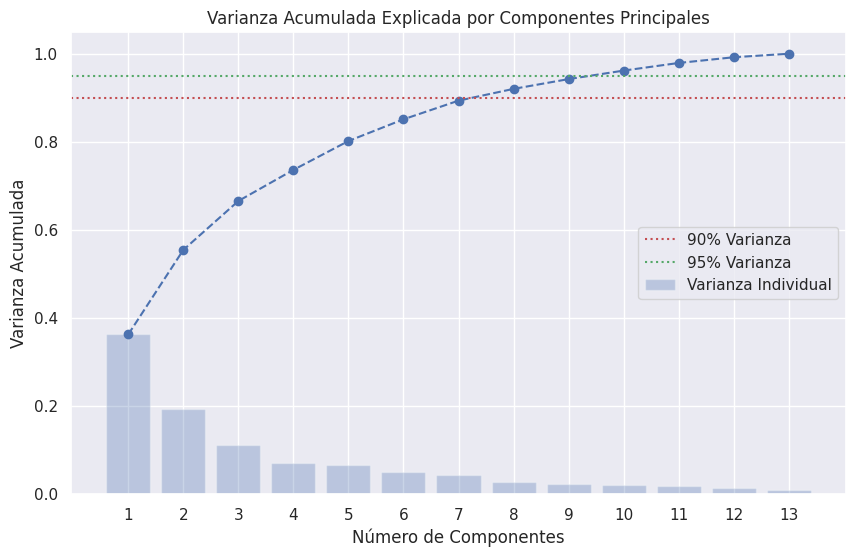


--- 2. Tabla de Proyecciones (primeras 5 filas) ---


,PC1,PC2,wine_class,target_name
0,3.316751,1.443463,0,class_0
1,2.209465,-0.333393,0,class_0
2,2.516740,1.031151,0,class_0
3,3.757066,2.756372,0,class_0
4,1.008908,0.869831,0,class_0



--- 3. Loadings (Influencia de variables en PC1 y PC2) ---


,PC1,PC2
alcohol,0.144329,0.483652
malic_acid,-0.245188,0.224931
ash,-0.002051,0.316069
alcalinity_of_ash,-0.239320,-0.010591
magnesium,0.141992,0.299634
total_phenols,0.394661,0.065040
flavanoids,0.422934,-0.003360
nonflavanoid_phenols,-0.298533,0.028779
proanthocyanins,0.313429,0.039302
color_intensity,-0.088617,0.529996



--- 4.1. Visualización 2D (PC1 vs PC2) ---


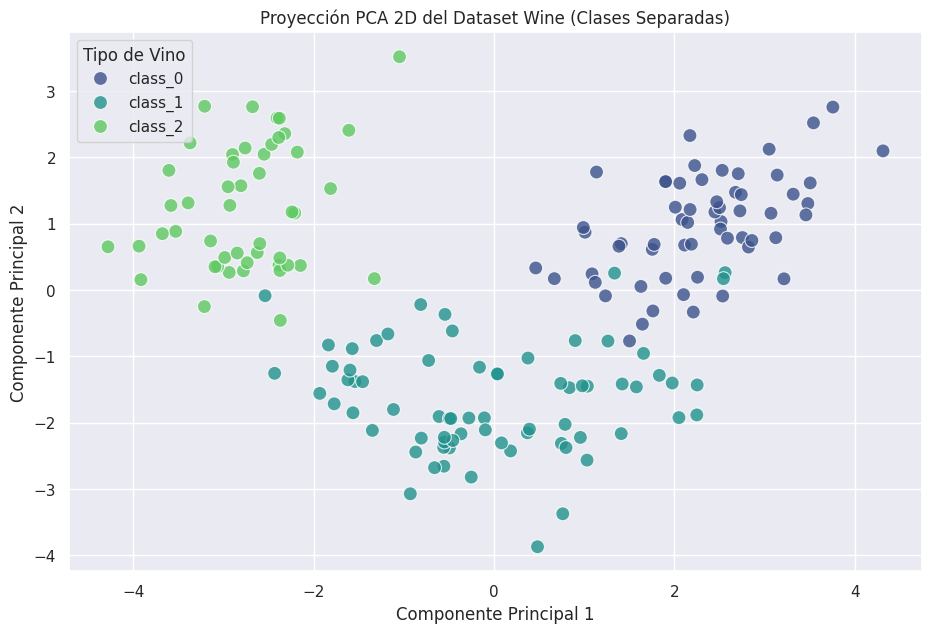


--- 4.2. Visualización 3D (PC1 vs PC2 vs PC3) ---


In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px
from IPython.display import display

X = wine[features]
y = wine[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

target_names = dataset.target_names

pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("--- 1. Varianza Explicada por Componente ---")
print(f"Varianza individual: {explained_variance.round(3)}")
print(f"Varianza acumulada:  {cumulative_variance.round(3)}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 14), cumulative_variance, marker='o', linestyle='--')
plt.bar(range(1, 14), explained_variance, alpha=0.3, label='Varianza Individual')
plt.axhline(y=0.90, color='r', linestyle=':', label='90% Varianza')
plt.axhline(y=0.95, color='g', linestyle=':', label='95% Varianza')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.xticks(range(1, 14))
plt.legend(loc='best')
plt.grid(True)
plt.show()

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d[target] = y
df_pca_2d['target_name'] = df_pca_2d[target].map(lambda x: target_names[x])

print("\n--- 2. Tabla de Proyecciones (primeras 5 filas) ---")
display(df_pca_2d.head())

df_loadings = pd.DataFrame(
    pca_2d.components_,
    columns=features,
    index=['PC1', 'PC2']
).T

print("\n--- 3. Loadings (Influencia de variables en PC1 y PC2) ---")
display(df_loadings.style.background_gradient(cmap='vlag', axis=0))

print("\n--- 4.1. Visualización 2D (PC1 vs PC2) ---")
plt.figure(figsize=(11, 7))
sns.scatterplot(
    data=df_pca_2d,
    x='PC1',
    y='PC2',
    hue='target_name',
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Proyección PCA 2D del Dataset Wine (Clases Separadas)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tipo de Vino')
plt.grid(True)
plt.show()

print("\n--- 4.2. Visualización 3D (PC1 vs PC2 vs PC3) ---")

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['target_name'] = df_pca_2d['target_name']

fig = px.scatter_3d(
    df_pca_3d,
    x='PC1',
    y='PC2',
    z='PC3',
    color='target_name',
    title='Proyección PCA 3D del Dataset Wine',
    labels={'target_name': 'Tipo de Vino'}
)
fig.update_traces(marker=dict(size=5))
fig.show()

El Análisis de Componentes Principales (PCA) demostró ser altamente efectivo para revelar la estructura de los datos del vino. Aunque se necesitan 7 componentes para explicar el 90% de la varianza total, los dos primeros componentes (PC1 y PC2) ya capturan el 55.4% y son suficientes para una visualización clara. El análisis de loadings muestra que PC1 contrasta vinos por su contenido de flavanoids y total_phenols frente a su alcalinity_of_ash, mientras que PC2 separa los vinos principalmente por su grado de alcohol y proline frente a su color_intensity. Lo más destacable es que, al proyectar los datos en 2D (y de forma aún más clara en 3D), las tres clases de vino (class_0, class_1, class_2) forman conglomerados visualmente distintos y bien separados, confirmando que PCA logró reducir la dimensionalidad de 13 variables reteniendo la información esencial que distingue a los grupos.



### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.



Ejecutando t-SNE con diferentes hiperparámetros (esto puede tardar)...
  Calculando: Perplexity=30, LR=200 (Estándar)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



  Calculando: Perplexity=5 (Baja)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



  Calculando: Perplexity=50 (Alta)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



  Calculando: Perplexity=30, LR=1000 (Alto)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Cálculo finalizado.


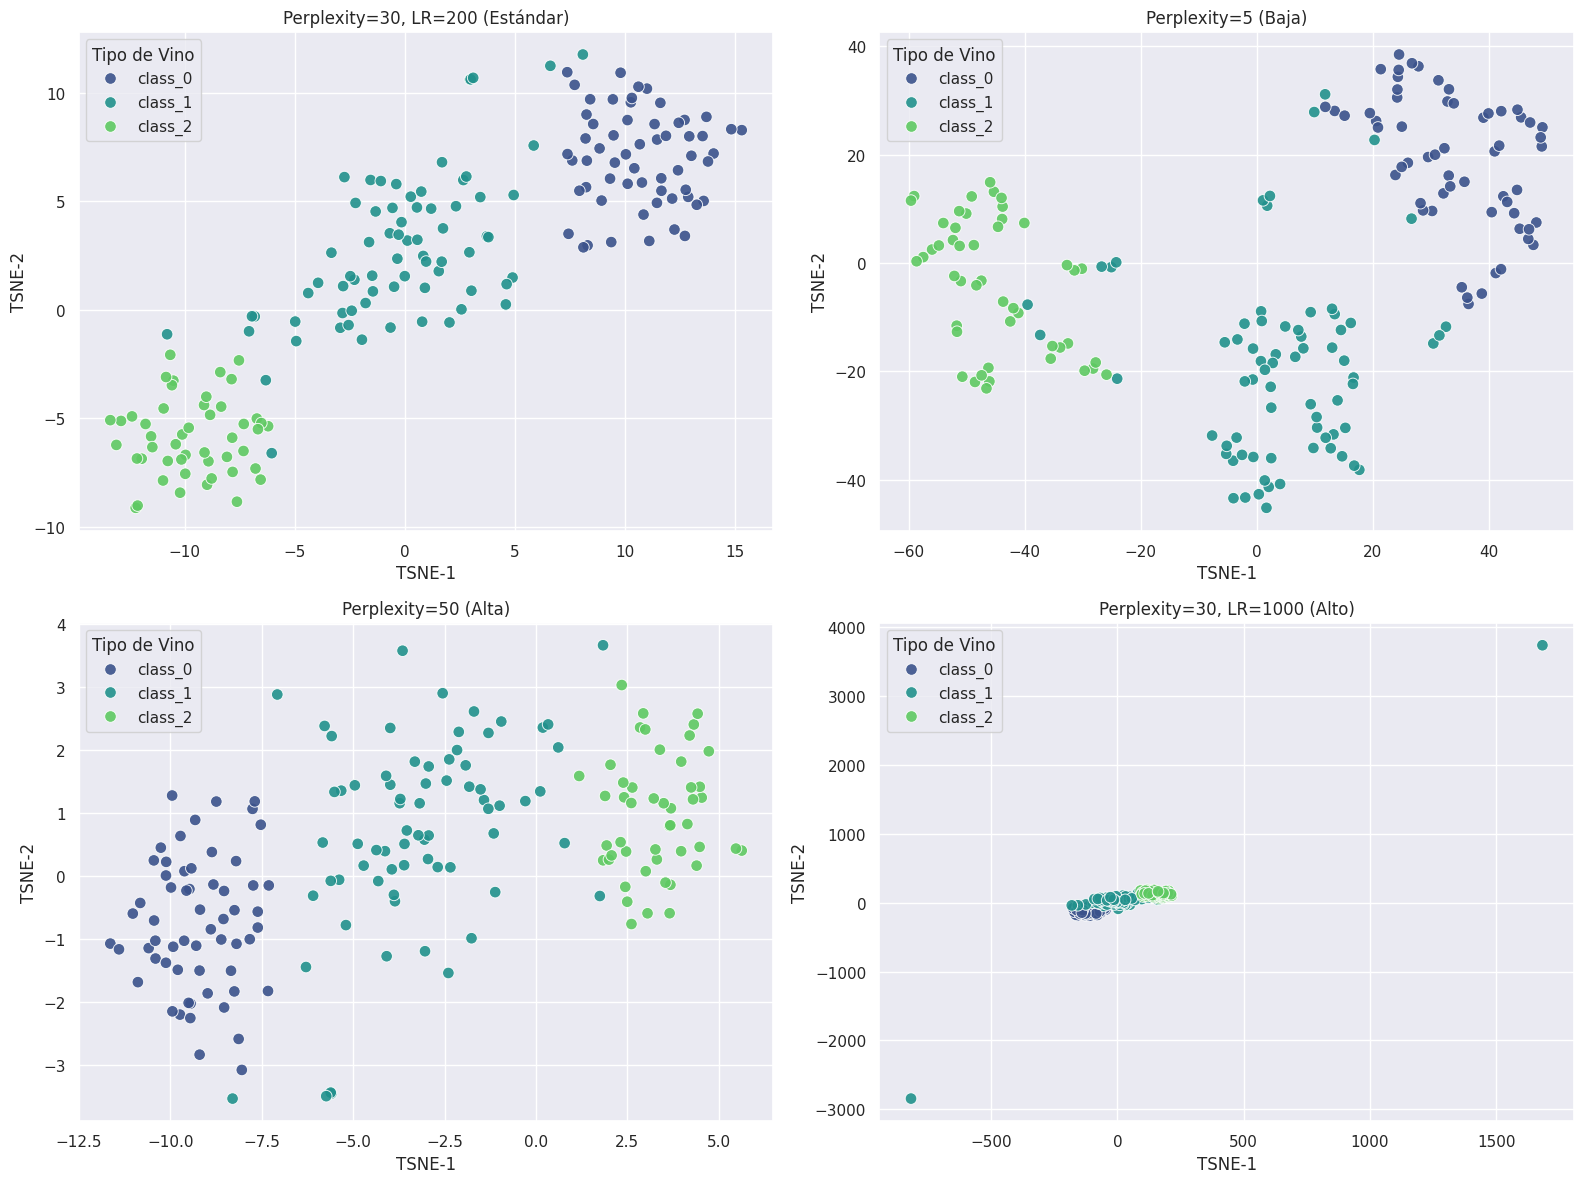

In [9]:
from sklearn.manifold import TSNE

configs = [
    (30, 200, 'Perplexity=30, LR=200 (Estándar)'),
    (5, 200, 'Perplexity=5 (Baja)'),
    (50, 200, 'Perplexity=50 (Alta)'),
    (30, 1000, 'Perplexity=30, LR=1000 (Alto)')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

print("Ejecutando t-SNE con diferentes hiperparámetros (esto puede tardar)...")

for i, (perp, lr, title) in enumerate(configs):

    print(f"  Calculando: {title}")
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate=lr,
        random_state=42,
        init='pca',
        n_iter=1000
    )

    X_tsne = tsne.fit_transform(X_scaled)

    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
    df_tsne['target'] = y
    df_tsne['target_name'] = df_tsne['target'].map(lambda x: target_names[x])

    ax = axes[i]
    sns.scatterplot(
        data=df_tsne,
        x='TSNE-1',
        y='TSNE-2',
        hue='target_name',
        palette='viridis',
        s=70,
        alpha=0.9,
        ax=ax
    )
    ax.set_title(title)
    ax.legend(title='Tipo de Vino')
    ax.grid(True)

print("Cálculo finalizado.")
plt.tight_layout()
plt.show()

La aplicación de t-SNE revela una capacidad de agrupación superior a PCA, logrando una separación de clústeres casi perfecta para las tres clases de vino. El ajuste de hiperparámetros es crítico: una perplexity baja (ej. 5) "rompe" la estructura global, creando múltiples sub-clústeres sin sentido al enfocarse demasiado en vecinos inmediatos, mientras que valores estándar (30) o altos (50) capturan mejor la agrupación real. El learning_rate afecta la "expansión" de los clústeres; un valor más alto (ej. 1000) tiende a crear grupos más compactos y visualmente más separados, aunque el valor estándar (200) ya es efectivo. A diferencia de PCA, que maximiza la varianza lineal, t-SNE optimiza la similitud de vecinos (una relación no lineal), lo que resulta en una visualización donde los puntos de la misma clase colapsan en "islas" densas y muy bien definidas, confirmando su potencia para la exploración visual de datos.



### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



La comparación entre PCA y t-SNE en el dataset Wine es reveladora: mientras PCA (un método lineal) logró una separación de clases notable al maximizar la varianza global, t-SNE (un método no lineal) fue superior para la visualización, creando "islas" de clústeres mucho más densas y claramente definidas al preservar las vecindades locales. La ventaja de PCA radica en su interpretabilidad (los loadings explican la varianza) y su utilidad como paso de pre-procesamiento rápido para modelos, pero puede fallar en capturar estructuras complejas. T-SNE, en cambio, es ideal para la exploración visual que revela patrones no lineales, aunque sus resultados no son estables (dependen de hiperparámetros) y las distancias globales entre sus clústeres no son significativas. Este ejercicio subraya la importancia de la reducción de dimensionalidad, ya que sin ella, sería imposible visualizar los patrones de agrupación ocultos en las 13 dimensiones originales; estas técnicas no solo facilitan la comunicación de resultados, sino que también son cruciales para reducir el ruido y la complejidad antes de aplicar otros algoritmos de aprendizaje automático.